# Computational Drug Discovery Biological Data

In [ ]:
# installing chembl_webresource_client
! pip install chembl_webresource_client

In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

## Search for target protein

### Target search protein for coronavirus

In [ ]:
target = new_client.target
target_query = target.search('coronavirus')
targets=pd.DataFrame.from_dict(target_query)
targets

In [ ]:
targets.columns


In [ ]:
is_present= (targets['target_chembl_id'] == 'CHEMBL3927' ).any()
is_present

In [ ]:
matching_index = targets.index[targets["target_chembl_id"] == "CHEMBL3927"]

print(matching_index)

##  Select and reterive bioactivity data for SARS coronavirus 3C-like proteinase

In [ ]:
# index 6
selected_target = targets.target_chembl_id[6]
selected_target

 Here we reterive only the biological data for coronavirus 3C like proteinase

In [ ]:
activity=new_client.activity
res= activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')

In [ ]:
df=pd.DataFrame.from_dict(res)
df

In [ ]:
df.columns

In [ ]:
df.head(3)

In [ ]:
df.standard_type.unique()   # lower no potency

In [ ]:
df.to_csv('bioactivity_data.csv', index=False)


Copying Files to google drive

In [46]:
!rm -rf /root/.config/Google/DriveFS
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [60]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


Next, we create a bioactivity_data folder in our Colab Notebooks folder on Google


In [61]:
!mkdir -p "/content/drive/My Drive/ml_notebooks/biological_data"


copy the bioactivity data file into ml_notebooks/bioactivity_data

In [62]:
!ls "/content/drive/My Drive/"


ml_notebooks


In [63]:

!cp "bioactivity_data.csv" "/content/drive/My Drive/ml_notebooks/bioactivity_data.csv"

In [64]:
!ls -l "/content/drive/My Drive/ml_notebooks/bioactivity_data.csv"

-rw-r--r-- 1 root root 138803 Aug 13 12:13 '/content/drive/My Drive/ml_notebooks/bioactivity_data.csv'


In [65]:
! head bioactivity_data.csv

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS coronavirus main protease (SARS CoV 3C-like protease),B,,,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,,,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', 'sei'

## Handling Missing data

In [66]:
df2=df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25516041,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336133,Inhibition of SARS-CoV N-terminal 6His-SUMO-ta...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,pIC50,None,UO_0000065,None,6.42
243,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25516042,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336133,Inhibition of SARS-CoV N-terminal 6His-SUMO-ta...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,0.165
244,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25516043,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336133,Inhibition of SARS-CoV N-terminal 6His-SUMO-ta...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,0.161
245,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25516044,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336133,Inhibition of SARS-CoV N-terminal 6His-SUMO-ta...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,pIC50,None,UO_0000065,None,6.78


# Data pre-processing of the bioactivity data

The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [67]:
bioactivity_class =[]
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else :
    bioactivity_class.append("intermediate")

Iterate the molecule_chembl_id to a list



In [69]:
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)
mol_cid

['CHEMBL187579',
 'CHEMBL188487',
 'CHEMBL185698',
 'CHEMBL426082',
 'CHEMBL187717',
 'CHEMBL365134',
 'CHEMBL187598',
 'CHEMBL190743',
 'CHEMBL365469',
 'CHEMBL188983',
 'CHEMBL191575',
 'CHEMBL370923',
 'CHEMBL194398',
 'CHEMBL196635',
 'CHEMBL209287',
 'CHEMBL358279',
 'CHEMBL348660',
 'CHEMBL379727',
 'CHEMBL210525',
 'CHEMBL148483',
 'CHEMBL383725',
 'CHEMBL118596',
 'CHEMBL208732',
 'CHEMBL208732',
 'CHEMBL210146',
 'CHEMBL210146',
 'CHEMBL207458',
 'CHEMBL207458',
 'CHEMBL207484',
 'CHEMBL207484',
 'CHEMBL207207',
 'CHEMBL207207',
 'CHEMBL210487',
 'CHEMBL210487',
 'CHEMBL380470',
 'CHEMBL380470',
 'CHEMBL210612',
 'CHEMBL210612',
 'CHEMBL209667',
 'CHEMBL209667',
 'CHEMBL210097',
 'CHEMBL210097',
 'CHEMBL378674',
 'CHEMBL378674',
 'CHEMBL210216',
 'CHEMBL210216',
 'CHEMBL210195',
 'CHEMBL210195',
 'CHEMBL210437',
 'CHEMBL210437',
 'CHEMBL378677',
 'CHEMBL378677',
 'CHEMBL210972',
 'CHEMBL210972',
 'CHEMBL210145',
 'CHEMBL210145',
 'CHEMBL377225',
 'CHEMBL377225',
 'CHEMBL210823

Iterate canonical_smiles to a list

In [70]:
canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)
canonical_smiles

['Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21',
 'O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21',
 'O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(F)cc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21',
 'O=C1C(=O)N(C/C=C/c2cc3ccccc3s2)c2ccc(I)cc21',
 'O=C(Nc1ccc(Cl)cc1)c1ccc(CN2C(=O)C(=O)c3cc(I)ccc32)s1',
 'O=C1C(=O)N(Cc2ccc(C(=O)N3CCCCC3)s2)c2ccc(I)cc21',
 'CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H](CC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C)Cc1ccccc1',
 'CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](CC=C(C)C)CC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C',
 'CCCCN1C(=O)C(=O)c2cc(I)ccc21',
 'NC(=O)c1ccc2c(c1)C(=O)C(=O)N2Cc1ccc2ccccc2c1',
 'NC(=O)c1ccc2c(c1)C(=O)C(=O)N2Cc1ccccc1',
 'CCCCN1C(=O)C(=O)c2cc(C(N)=O)ccc21',
 'CCCN1C(=O)C(=O)c2cc(C(N)=O)ccc21',
 'CN1C(=O)C(=O)c2cc(C(N)=O)ccc21',
 'O=C1C(=O)N(Cc2cc

Iterate standard_value to a list

In [71]:
standard_value = []
for i in df2.standard_value:
  standard_value.append(i)
standard_value

['7200.0',
 '9400.0',
 '13500.0',
 '13110.0',
 '2000.0',
 '980.0',
 '4820.0',
 '950.0',
 '11200.0',
 '23500.0',
 '12570.0',
 '17500.0',
 '45000.0',
 '70000.0',
 '66000.0',
 '370.0',
 '12500.0',
 '19000.0',
 '25000.0',
 '71000.0',
 '1100.0',
 '50000.0',
 '3019.95',
 '3000.0',
 '301995.17',
 '300000.0',
 '251188.64',
 '250000.0',
 '204173.79',
 '200000.0',
 '100000.0',
 '100000.0',
 '60255.96',
 '60000.0',
 '45708.82',
 '45000.0',
 '40738.03',
 '40000.0',
 '15135.61',
 '15000.0',
 '15135.61',
 '15000.0',
 '12022.64',
 '12000.0',
 '1000000.0',
 '1000000.0',
 '501187.23',
 '500000.0',
 '407380.28',
 '400000.0',
 '354813.39',
 '350000.0',
 '301995.17',
 '300000.0',
 '301995.17',
 '300000.0',
 '204173.79',
 '200000.0',
 '204173.79',
 '200000.0',
 '204173.79',
 '200000.0',
 '204173.79',
 '200000.0',
 '60255.96',
 '60000.0',
 '40738.03',
 '40000.0',
 '30199.52',
 '30000.0',
 '15135.61',
 '15000.0',
 '14125.38',
 '14000.0',
 '11220.18',
 '11000.0',
 '10000.0',
 '10000.0',
 '900.0',
 '6000.0',
 

Combine the 4 lists into a dataframe

In [72]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3=pd.DataFrame(data_tuples, columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0
...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,active,380.19
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,165.0
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,active,161.0
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,165.96


from matplotlib import pyplot as plt
import seaborn as sns
df3.groupby('bioactivity_class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

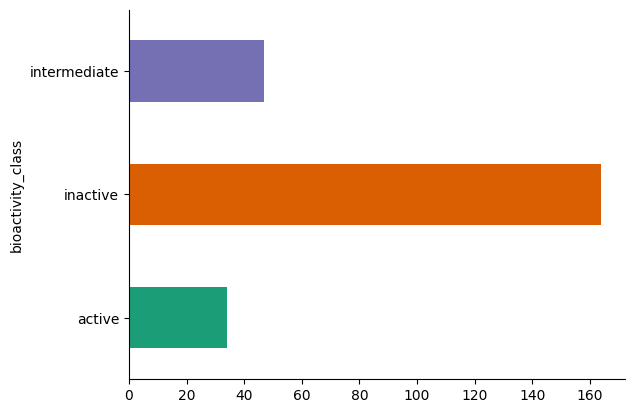

In [92]:
# @title bioactivity_class

from matplotlib import pyplot as plt
import seaborn as sns
df3.groupby('bioactivity_class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

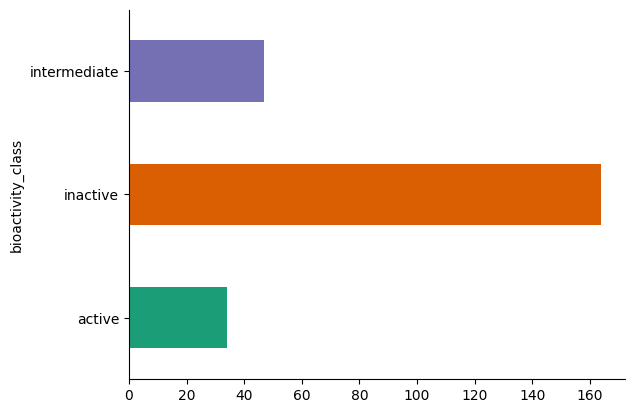

In [73]:
# @title bioactivity_class

from matplotlib import pyplot as plt
import seaborn as sns
df3.groupby('bioactivity_class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [75]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df4 = df2[selection]
df4
df4.head(3)


,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('molecule_chembl_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('canonical_smiles').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('standard_value').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['canonical_smiles'].value_counts()
    for x_label, grp in _df_3.groupby('molecule_chembl_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('molecule_chembl_id')
_ = plt.ylabel('canonical_smiles')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['standard_value'].value_counts()
    for x_label, grp in _df_4.groupby('canonical_smiles')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('canonical_smiles')
_ = plt.ylabel('standard_value')

In [76]:
pd.concat([df4,pd.Series(bioactivity_class)], axis=1)

,molecule_chembl_id,canonical_smiles,standard_value,0
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
244,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,161.0,active
245,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.96,NaN
246,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,162.18,NaN
220,NaN,NaN,NaN,inactive


In [85]:

df3.to_csv('bioactivity_preprocessed_data.csv', index=False)


In [91]:
from google.colab import drive
# drive.mount('/content/drive')
!cp "bioactivity_preprocessed_data.csv" "/content/drive/My Drive/ml_notebooks/"
!ls "/content/drive/My Drive/ml_notebooks/"


bioactivity_data.csv  bioactivity_preprocessed_data.csv  biological_data


In [94]:
! head bioactivity_preprocessed_data.csv

molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0
CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,980.0
CHEMBL187598,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(F)cc21,intermediate,4820.0
CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,950.0
CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,11200.0


In [95]:
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0
...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,active,380.19
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,165.0
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,active,161.0
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,165.96


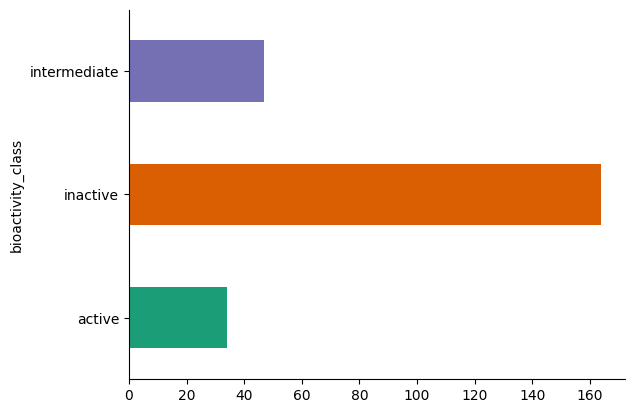

In [96]:
# @title bioactivity_class

from matplotlib import pyplot as plt
import seaborn as sns
df3.groupby('bioactivity_class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)